In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
bank15 = pd.read_csv("INFOBANK15cleaned.csv",delimiter=';')
idr = pd.read_csv("IDR=X.csv")

In [78]:
bank15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tanggal    1474 non-null   object
 1   Terakhir   1474 non-null   object
 2   Pembukaan  1474 non-null   object
 3   Tertinggi  1474 non-null   object
 4   Terendah   1474 non-null   object
dtypes: object(5)
memory usage: 57.7+ KB


In [79]:
bank15

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah
0,23/12/2016,"576,13","573,42","583,95","571,82"
1,27/12/2016,"582,88","573,62","584,16","571,97"
2,28/12/2016,"594,3","587,15","596,84","585,79"
3,29/12/2016,"611,62","597,09","612,95","595,25"
4,30/12/2016,"613,8","612,84","618,86","610,75"
...,...,...,...,...,...
1469,10/01/2023,"1075,98","1111,33","1111,33","1071,49"
1470,11/01/2023,"1056,63","1075,98","1075,98","1054,35"
1471,12/01/2023,"1078,08","1056,7","1089,68","1056,7"
1472,13/01/2023,"1072,92","1078,15","1082,06","1065,78"


In [80]:
bank15["Terakhir"] = [item.replace(',', '.') for item in bank15['Terakhir']] 


In [81]:
bank15['Terakhir'] = bank15['Terakhir'].astype(float)

In [82]:
bank15['Pembukaan'] = [item.replace(',', '.') for item in bank15['Pembukaan']]

In [83]:
bank15['Pembukaan'] = bank15['Pembukaan'].astype(float)

In [84]:
bank15['Tertinggi'] = [item.replace(',', '.') for item in bank15['Tertinggi']]

In [85]:
bank15['Tertinggi'] = bank15['Tertinggi'].astype(float)

In [86]:
bank15['Terendah'] = [item.replace(',', '.') for item in bank15['Terendah']]
bank15['Terendah'] = bank15['Terendah'].astype(float)

In [87]:
bank15['Tanggal'] = pd.to_datetime(bank15['Tanggal'])

In [88]:
for i in range(1,5):
    print(i)

1
2
3
4


In [89]:
# Assuming you have a DataFrame named 'infobank15' containing high, low, and close prices
# Create a new column to store the True Range values
bank15['TrueRange'] = np.nan

# Calculate True Range for each row
for i in range(1, len(bank15)):
    high = bank15['Tertinggi'].iloc[i]
    low = bank15['Terendah'].iloc[i]
    close_prev = bank15['Terakhir'].iloc[i-1]
    
    true_range = max(high - low, abs(high - close_prev), abs(low - close_prev))
    bank15['TrueRange'].iloc[i] = true_range

# Calculate the Average True Range using the rolling mean
window = 14  # ATR window size
bank15['ATR'] = bank15['TrueRange'].rolling(window).mean().fillna(0)

print(bank15['ATR'])

c:\Users\Dimas\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
1469    15.786429
1470    16.700714
1471    18.387143
1472    18.888571
1473    18.915714
Name: ATR, Length: 1474, dtype: float64


In [90]:
# Calculate price change
price_change = bank15['Terakhir'].diff()

# Calculate upward price change and downward price change
upward_price_change = price_change.where(price_change > 0, 0)
downward_price_change = -price_change.where(price_change < 0, 0)

# Calculate average gain and average loss over the 14-day window
average_gain = upward_price_change.rolling(window=14).mean()
average_loss = downward_price_change.rolling(window=14).mean()

# Calculate the relative strength (RS)
relative_strength = average_gain / average_loss

# Calculate the relative strength index (RSI)
rsi = 100 - (100 / (1 + relative_strength))

# Add the RSI values to the DataFrame
bank15['RSI'] = rsi

In [91]:
bank15.drop(['TrueRange'],axis=1,inplace=True)

In [92]:
idr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1580 non-null   object 
 1   Open       1577 non-null   float64
 2   High       1577 non-null   float64
 3   Low        1577 non-null   float64
 4   Close      1577 non-null   float64
 5   Adj Close  1577 non-null   float64
 6   Volume     1577 non-null   float64
dtypes: float64(6), object(1)
memory usage: 86.5+ KB


In [93]:
bank15

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,ATR,RSI
0,2016-12-23,576.13,573.42,583.95,571.82,0.000000,NaN
1,2016-12-27,582.88,573.62,584.16,571.97,0.000000,NaN
2,2016-12-28,594.30,587.15,596.84,585.79,0.000000,NaN
3,2016-12-29,611.62,597.09,612.95,595.25,0.000000,NaN
4,2016-12-30,613.80,612.84,618.86,610.75,0.000000,NaN
...,...,...,...,...,...,...,...
1469,2023-10-01,1075.98,1111.33,1111.33,1071.49,15.786429,15.545959
1470,2023-11-01,1056.63,1075.98,1075.98,1054.35,16.700714,10.484184
1471,2023-12-01,1078.08,1056.70,1089.68,1056.70,18.387143,24.836508
1472,2023-01-13,1072.92,1078.15,1082.06,1065.78,18.888571,20.307560


In [94]:
bank15 = bank15.set_index(['Tanggal'])

In [95]:
idr = idr[['Date','Close']]

In [96]:
idr['Date'] = pd.to_datetime(idr['Date'])

In [97]:
idr = idr.rename(columns={'Date': 'Tanggal','Close':'Close IDR'})

In [98]:
idr = idr.set_index('Tanggal')

In [99]:
df = pd.merge(bank15,idr,how='inner',left_index=True,right_index=True)

In [100]:
df.head(50)

,Terakhir,Pembukaan,Tertinggi,Terendah,ATR,RSI,Close IDR
Tanggal,,,,,,,
2016-12-23,576.13,573.42,583.95,571.82,0.000000,NaN,13449.0
2016-12-27,582.88,573.62,584.16,571.97,0.000000,NaN,13442.0
2016-12-28,594.30,587.15,596.84,585.79,0.000000,NaN,13429.0
2016-12-29,611.62,597.09,612.95,595.25,0.000000,NaN,13490.0
2016-12-30,613.80,612.84,618.86,610.75,0.000000,NaN,13466.0
2017-03-01,614.64,614.76,614.76,606.27,0.000000,NaN,13391.0
2017-05-01,615.20,619.69,621.51,612.63,0.000000,NaN,13322.0
2017-06-01,616.02,613.45,617.67,612.67,0.000000,NaN,13294.0
2017-09-01,607.59,615.29,618.40,605.66,0.000000,NaN,13321.0


In [101]:
df['RSI'].fillna(0,inplace=True)

In [102]:
df

,Terakhir,Pembukaan,Tertinggi,Terendah,ATR,RSI,Close IDR
Tanggal,,,,,,,
2016-12-23,576.13,573.42,583.95,571.82,0.000000,0.000000,13449.000000
2016-12-27,582.88,573.62,584.16,571.97,0.000000,0.000000,13442.000000
2016-12-28,594.30,587.15,596.84,585.79,0.000000,0.000000,13429.000000
2016-12-29,611.62,597.09,612.95,595.25,0.000000,0.000000,13490.000000
2016-12-30,613.80,612.84,618.86,610.75,0.000000,0.000000,13466.000000
...,...,...,...,...,...,...,...
2022-12-26,1155.56,1148.94,1158.14,1148.94,18.990714,36.964322,15565.900391
2022-12-27,1150.40,1155.67,1160.17,1145.97,17.920000,44.128344,15607.000000
2022-12-28,1146.11,1150.40,1154.28,1140.89,16.990714,44.260700,15617.500000


In [103]:
confidence = pd.read_excel('ConsumerConfidence.xlsx')

In [104]:
confidence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release Date  72 non-null     datetime64[ns]
 1   Actual        72 non-null     float64       
 2   Previous      72 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.8 KB


In [105]:
confidence = confidence.rename(columns={'Release Date':'Tanggal','Actual':'Consumer Confidence'})

In [106]:
confidence = confidence.set_index('Tanggal')

In [107]:
confidence = confidence['Consumer Confidence']

In [108]:
all_df = pd.merge(df, confidence, on='Tanggal', how='outer')


In [109]:
all_df.isnull().sum()

Terakhir                 32
Pembukaan                32
Tertinggi                32
Terendah                 32
ATR                      32
RSI                      32
Close IDR                35
Consumer Confidence    1261
dtype: int64

In [110]:
all_df['Consumer Confidence']= all_df['Consumer Confidence'].fillna(method='ffill')

In [111]:
all_df.isnull().sum()

Terakhir               32
Pembukaan              32
Tertinggi              32
Terendah               32
ATR                    32
RSI                    32
Close IDR              35
Consumer Confidence    78
dtype: int64

In [112]:
all_df.loc['2017-01-11':'2017-02-03','Consumer Confidence'].fillna(115.4,inplace= True)

In [113]:
all_df.loc['2017-01-11':'2017-02-03','Consumer Confidence'] = 115.4

In [114]:
all_df.loc['2016-12-23':'2017-01-03','Consumer Confidence'] = 115.9

In [115]:
all_df

,Terakhir,Pembukaan,Tertinggi,Terendah,ATR,RSI,Close IDR,Consumer Confidence
Tanggal,,,,,,,,
2016-12-23,576.13,573.42,583.95,571.82,0.0,0.0,13449.0,115.9
2016-12-27,582.88,573.62,584.16,571.97,0.0,0.0,13442.0,115.9
2016-12-28,594.30,587.15,596.84,585.79,0.0,0.0,13429.0,115.9
2016-12-29,611.62,597.09,612.95,595.25,0.0,0.0,13490.0,115.9
2016-12-30,613.80,612.84,618.86,610.75,0.0,0.0,13466.0,115.9
...,...,...,...,...,...,...,...,...
2022-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.6
2022-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.9
2022-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.2


In [116]:
emas = pd.read_excel("Data-Historis-Emas-Berjangka.xlsx")

In [117]:
emas['Tanggal'] = pd.to_datetime(emas['Tanggal'])

In [118]:
emas = emas.set_index('Tanggal')

In [119]:
emas.sort_index(inplace= True)

In [120]:
emas = emas.rename(columns={'Terakhir ':'Emas USD'})

In [121]:
emas = emas['Emas USD']

In [122]:
temp_df = pd.merge(all_df,emas,how='inner',left_index=True,right_index=True)

In [123]:
rate = pd.read_excel("BI Rate.xlsx")

In [124]:
rate

,Tanggal,BI Rate,Inflasi
0,23/12/2016,4.75,3.02
1,27/12/2016,4.75,3.02
2,28/12/2016,4.75,3.02
3,29/12/2016,4.75,3.02
4,30/12/2016,4.75,3.02
...,...,...,...
1550,26/12/2022,5.50,5.51
1551,27/12/2022,5.50,5.51
1552,28/12/2022,5.50,5.51
1553,29/12/2022,5.50,5.51


In [125]:
rate['Tanggal']= pd.to_datetime(rate['Tanggal'])

In [126]:
rate = rate.set_index("Tanggal")

In [127]:
temp_df = pd.merge(temp_df,rate,how='inner',left_index=True,right_index=True)

In [128]:
all_df = temp_df.copy()

In [129]:
all_df = all_df.dropna()

In [69]:
#all_df.to_csv('dataset TA.csv',index=True)

In [8]:
#all_df = pd.read_csv("dataset TA.csv",index_col='Tanggal')

In [130]:
import pywt

# Extract the closing stock price as a 1D array
closing_price = all_df['Terakhir'].values

# Perform wavelet decomposition
coeffs = pywt.wavedec(closing_price, wavelet='db4')

# Set a threshold to remove noise (e.g., using universal thresholding)
threshold = np.sqrt(2 * np.log(len(closing_price)))
coeffs_denoised = [pywt.threshold(c, threshold) for c in coeffs]

# Perform wavelet reconstruction
denoised_data = pywt.waverec(coeffs_denoised, wavelet='db4')

# Update the 'Close' column with the denoised data
all_df['Terakhir'] = denoised_data[:-1]  # Remove the last element from denoised_data


In [51]:
statistik = all_df.describe()
statistik.to_csv('statistik.csv',index=True)

In [52]:
statistik

,Terakhir,Pembukaan,Close IDR,Consumer Confidence,Emas USD,BI Rate
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,936.735608,937.285689,14296.408617,107.478807,1566.812168,4.504835
std,141.829755,142.196597,594.953883,25.731692,257.061895,0.862922
min,576.130000,573.420000,13197.000000,2.500000,1133.600000,3.500000
25%,824.460000,823.950000,13976.613281,104.400000,1297.200000,3.500000
50%,945.100000,946.210000,14276.000000,115.900000,1587.900000,4.250000
75%,1035.980000,1039.070000,14584.200195,126.400000,1800.100000,5.250000
max,1242.190000,1244.280000,16504.800781,128.200000,2069.400000,6.000000


In [69]:
all_df.head(20)

,Terakhir,Pembukaan,Tertinggi,Terendah,ATR,RSI,Close IDR,Consumer Confidence,Emas USD,BI Rate,Inflasi
Tanggal,,,,,,,,,,,
2016-12-23,580.896716,573.42,583.95,571.82,0.000000,0.000000,13449.0,115.9,1133.6,4.75,3.02
2016-12-27,587.138957,573.62,584.16,571.97,0.000000,0.000000,13442.0,115.9,1138.8,4.75,3.02
2016-12-28,596.728452,587.15,596.84,585.79,0.000000,0.000000,13429.0,115.9,1140.9,4.75,3.02
2016-12-29,610.422841,597.09,612.95,595.25,0.000000,0.000000,13490.0,115.9,1158.1,4.75,3.02
2016-12-30,612.748298,612.84,618.86,610.75,0.000000,0.000000,13466.0,115.9,1151.7,4.75,3.02
2017-01-13,601.897127,611.25,613.96,605.77,0.000000,72.279014,13258.0,115.4,1196.2,4.75,3.49
2017-01-16,600.560561,607.70,607.84,600.44,9.398571,68.092338,13313.0,115.4,1212.9,4.75,3.49
2017-01-17,605.734054,601.00,606.15,601.00,8.895714,65.481845,13349.0,115.4,1214.3,4.75,3.49
2017-01-18,606.668750,605.38,608.34,604.27,8.273571,61.878173,13296.0,115.4,1212.1,4.75,3.49


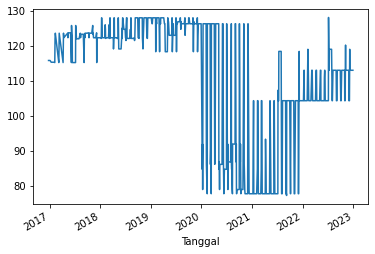

In [131]:
all_df['Consumer Confidence'].plot()

In [ ]:
sample.to_csv('sample.csv',index= False)

In [132]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler object
scaler = MinMaxScaler()
scaler1 = MinMaxScaler()

# Transform your data using the scaler
#normalized_data = scaler.transform(your_data)


In [133]:
# Fit the scaler to your data
scaler.fit(all_df)

# Transform your data using the scaler
normalized_data = pd.DataFrame(scaler.fit_transform(all_df), columns=all_df.columns)
normalized_price = scaler1.fit_transform(np.array(all_df['Terakhir']).reshape(-1,1))


In [73]:
normalized_price

array([[0.        ],
       [0.00953525],
       [0.02418355],
       ...,
       [0.87239822],
       [0.86988233],
       [0.8683652 ]])

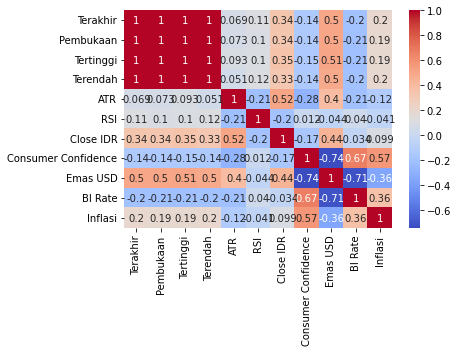

In [134]:
#heatmap corr
corr_matrix = normalized_data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

figsize = (20,20)

# save the figure as an image file
#plt.savefig('correlation_heatmap.png')


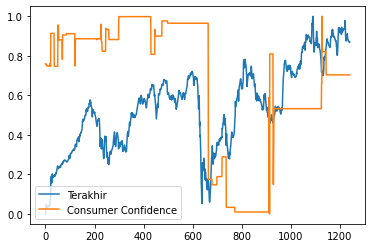

In [135]:
normalized_data[['Terakhir','Consumer Confidence']].plot()

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split


c:\Users\Dimas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\Dimas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\Dimas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\Dimas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [ ]:
def DatasetCreation(dataset, time_step = 1):  ##defining a function that gives a dataset and a time step, which then returns the input and output data
   DataX, DataY = [], []
   for i in range(len(dataset)- time_step -1):
         a = dataset[i:(i+ time_step), ]
         DataX.append(a)
         DataY.append(dataset[i + time_step, 0]) #ydata consists close price
   return np.array(DataX), np.array(DataY)


In [174]:
#ormalized data
#scaled_data = scaler.fit_transform(all_df)


# Split the data into input and output variables
X = normalized_data.drop(['Terakhir','Pembukaan','Tertinggi','Terendah'], axis=1)
y = normalized_data['Terakhir']
dates = all_df.index


# Split the data into training and testing sets
X_train, X_test, y_train, y_test,train_dates, test_dates = train_test_split(X, y,dates, test_size=0.2,shuffle=False)

In [160]:
X

,ATR,RSI,Close IDR,Consumer Confidence,Emas USD,BI Rate,Inflasi
0,0.000000,0.000000,0.076184,0.75835,0.000000,0.5,0.367171
1,0.000000,0.000000,0.074067,0.75835,0.005557,0.5,0.367171
2,0.000000,0.000000,0.070137,0.75835,0.007801,0.5,0.367171
3,0.000000,0.000000,0.088578,0.75835,0.026181,0.5,0.367171
4,0.000000,0.000000,0.081323,0.75835,0.019342,0.5,0.367171
...,...,...,...,...,...,...,...
1236,0.300442,0.390189,0.716156,0.70334,0.722483,0.8,0.904968
1237,0.283503,0.465811,0.728581,0.70334,0.736803,0.8,0.904968
1238,0.268801,0.467208,0.731755,0.70334,0.729002,0.8,0.904968
1239,0.261896,0.499728,0.783602,0.70334,0.739902,0.8,0.904968


In [203]:
# Reshape the input variables for the LSTM model
# X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Reshape the input variables for the LSTM model with 5 timestep
timestep = 5
n_features = X_train.shape[1]
n_samples_train = X_train.shape[0] - timestep + 1
n_samples_test = X_test.shape[0] - timestep + 1
X_train_reshaped = np.zeros((n_samples_train, timestep, n_features))
X_test_reshaped = np.zeros((n_samples_test, timestep, n_features))

# for i in range(n_samples_train):
#     X_train_reshaped[:, :, i] = X_train[i:i+timestep, :]
# for i in range(n_samples_test):
#     X_test_reshaped[i, :, :] = X_test[i:i+timestep, :]
#X_train[0:(1+timestep)]
y_train[0:timestep]
#a = dataset[i:(i+ time_step), ]

0    0.000000
1    0.009535
2    0.024184
3    0.045102
4    0.048654
Name: Terakhir, dtype: float64

In [156]:
# y_train= y_train.values.reshape(-1,1)
# y_test = y_test.values.reshape(-1,1)
X_train.shape

(992, 1, 7)

In [ ]:
#Prepare the data
# timestep = 1
# X = []
# y = []
# for i in range(timestep, len(scaled_data)):
#     X.append(scaled_data[i-timestep:i, :])
#     y.append(scaled_data[i, 0])
# X = np.array(X)
# y = np.array(y)

In [ ]:
# Split the data into training and testing sets
# split = int(0.8 * len(X))
# X_train, X_test = X[:split], X[split:]
# y_train, y_test = y[:split], y[split:]

In [149]:
# Build the LSTM model
timestep = 5
lr = 0.001
optimizer = Adam(lr=lr)
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(timestep, X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer= optimizer)


In [140]:
from tensorflow.keras.callbacks import EarlyStopping

In [150]:

# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)


# Train the model
history = model.fit(X_train, y_train, epochs=50,batch_size=8, validation_data=(X_test, y_test),callbacks=[early_stop],shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

ValueError: Error when checking input: expected lstm_1_input to have shape (5, 7) but got array with shape (1, 7)

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 150)               93600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 93,751
Trainable params: 93,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# from sklearn.metrics import mean_squared_error
# # Get the predicted values
# y_pred = model.predict(X_test)
# y_pred = scaler1.inverse_transform(y_pred)
# y_test = scaler1.inverse_transform(y_test.values.reshape(-1,1))
# # Calculate the mean squared error
# rmse = mean_squared_error(y_test, y_pred,squared=False)
# print('Mean Squared Error:', rmse)

Mean Squared Error: 12.910606367326537


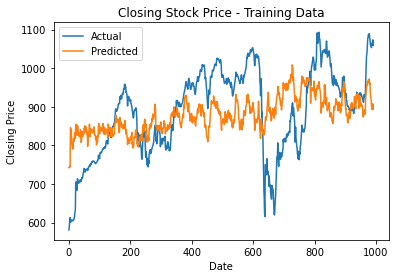

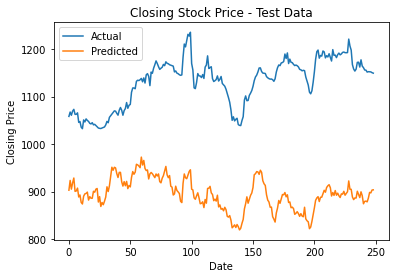

In [142]:
train_pred = model.predict(X_train)
train_pred = scaler1.inverse_transform(train_pred)
train_actual = scaler1.inverse_transform(y_train.values.reshape(-1, 1))

test_pred = model.predict(X_test)
test_pred = scaler1.inverse_transform(test_pred)
test_actual = scaler1.inverse_transform(y_test.values.reshape(-1, 1))

#Plot the true closing price together with its predictions on the training data
plt.plot(train_actual, label='Actual')
plt.plot(train_pred, label='Predicted')
plt.title('Closing Stock Price - Training Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# #Plot the true closing price together with its predictions on the test data
plt.plot(test_actual, label='Actual')
plt.plot(test_pred, label='Predicted')
plt.title('Closing Stock Price - Test Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [145]:
from sklearn.metrics import r2_score

# Assuming you have the actual stock prices in 'actual_prices' and predicted stock prices in 'predicted_prices'

r2 = r2_score(test_actual, test_pred)
print("R^2: {}".format(r2))

R^2: -21.693327867320676


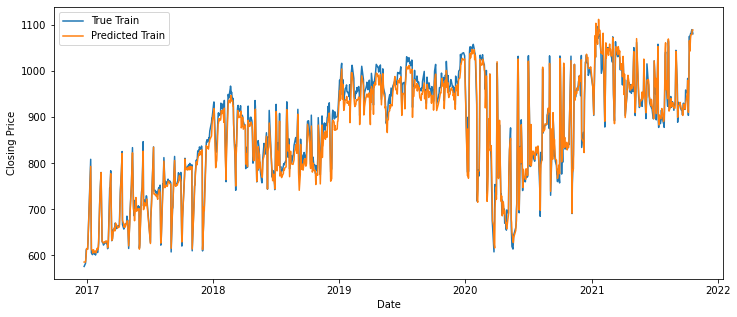

In [ ]:
# Plot the true and predicted closing prices on the training set
plt.figure(figsize=(12, 5))
plt.plot(train_dates, train_actual, label='True Train')
plt.plot(train_dates.sort_values(), train_pred, label='Predicted Train')
plt.xlabel('Date')
plt.ylabel('Closing Price')
#plt.title('True vs Predicted Closing Prices - Training Set')
plt.legend()
plt.savefig('True vs Predicted Closing Prices - Training Set (150 Neuron).png')
plt.show()

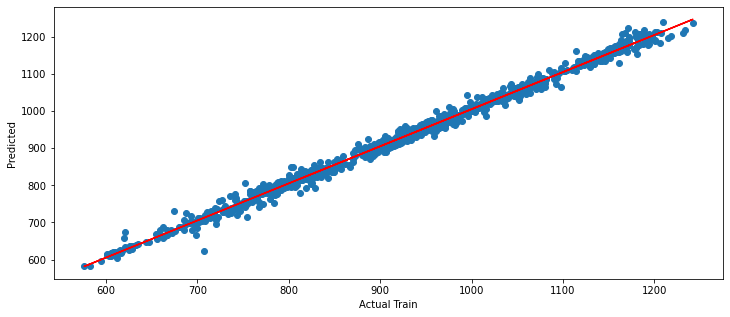

In [ ]:
plt.figure(figsize=(12, 5))
plt.scatter(train_actual,train_pred)
# Calculate the best fit line
slope, intercept = np.polyfit(train_actual.flatten(),train_pred,1)
# Add the best fit line to the plot
plt.plot(train_actual, slope*train_actual + intercept, color='red')
plt.xlabel('Actual Train')
plt.ylabel('Predicted')
plt.savefig('Train Actual-Predicted.png')
plt.show()


In [ ]:
train_actual.flatten()

array([ 812.98, 1197.07, 1156.62, ..., 1146.11,  966.99, 1179.98])

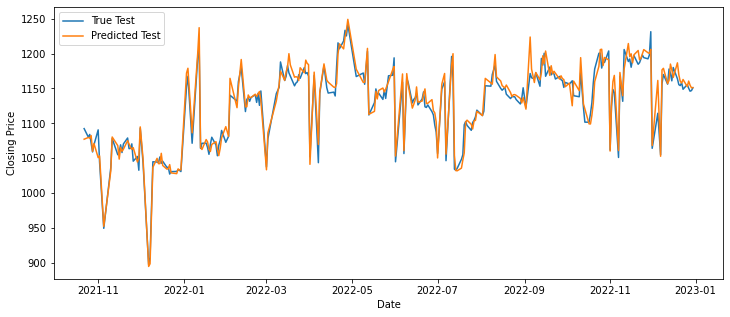

In [ ]:
# Plot the true and predicted closing prices on the test set
plt.figure(figsize=(12, 5))
plt.plot(test_dates.sort_values(), test_actual, label='True Test')
plt.plot(test_dates.sort_values(), test_pred, label='Predicted Test')
plt.xlabel('Date')
plt.ylabel('Closing Price')
#plt.title('True vs Predicted Closing Prices - Test Set')
plt.legend()
plt.savefig('True vs Predicted Closing Prices - Test Set (150 Neuron).png')
plt.show()

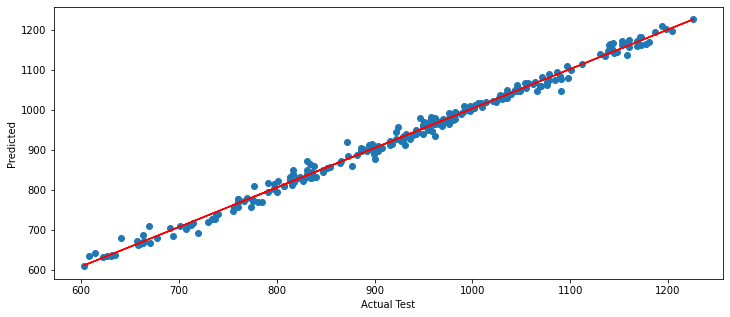

In [ ]:
plt.figure(figsize=(12, 5))
plt.scatter(test_actual,test_pred)
# Calculate the best fit line
slope, intercept = np.polyfit(test_actual.flatten(),test_pred,1)
# Add the best fit line to the plot
plt.plot(test_actual, slope*test_actual + intercept, color='red')
plt.xlabel('Actual Test')
plt.ylabel('Predicted')
plt.savefig('Test Actual-Predicted.png')
plt.show()

In [315]:
rmse_tes = mean_squared_error(test_actual, test_pred,squared=False)
rmse_tes

NameError: name 'mean_squared_error' is not defined

In [ ]:
rmse_train = mean_squared_error(train_actual, train_pred,squared=False)
rmse_train

15.703705916292876

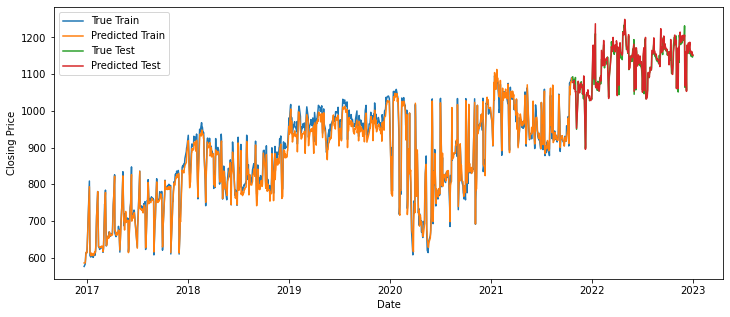

In [ ]:
# Plot the true and predicted closing prices on the training set
plt.figure(figsize=(12, 5))
plt.plot(train_dates.sort_values(), train_actual, label='True Train')
plt.plot(train_dates.sort_values(), train_pred, label='Predicted Train')
plt.plot(test_dates.sort_values(),test_actual,label = 'True Test')
plt.plot(test_dates.sort_values(),test_pred,label = 'Predicted Test')
plt.xlabel('Date')
plt.ylabel('Closing Price')
#plt.title('True vs Predicted Closing Prices - Training Set')
plt.legend()
plt.savefig('True vs Predicted Closing Prices - Training Set (150 Neuron).png')
plt.show()

In [ ]:
train_actual

array([[ 812.98],
       [1197.07],
       [1156.62],
       ...,
       [1146.11],
       [ 966.99],
       [1179.98]])

In [ ]:
all_df['Terakhir'][1:1037]

Tanggal
2016-12-27     582.88
2016-12-28     594.30
2016-12-29     611.62
2016-12-30     613.80
2017-01-02     613.54
               ...   
2021-10-14    1080.94
2021-10-15    1079.80
2021-10-18    1090.33
2021-10-19    1089.95
2021-10-21    1081.30
Name: Terakhir, Length: 1036, dtype: float64

In [ ]:
train_actual

array([[ 812.98],
       [1197.07],
       [1156.62],
       ...,
       [1146.11],
       [ 966.99],
       [1179.98]])

In [ ]:
train_dates

DatetimeIndex(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2017-01-02', '2017-01-03', '2017-01-11',
               '2017-01-13', '2017-01-16',
               ...
               '2021-10-06', '2021-10-08', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-18',
               '2021-10-19', '2021-10-21'],
              dtype='datetime64[ns]', name='Tanggal', length=1037, freq=None)

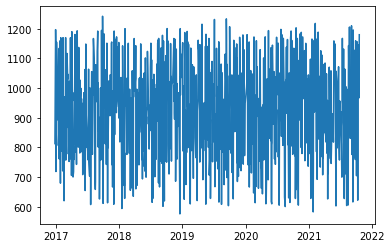

In [ ]:
plt.plot(train_dates,train_actual)

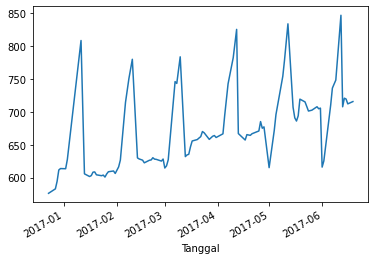

In [ ]:
all_df[0:100]['Terakhir'].plot()

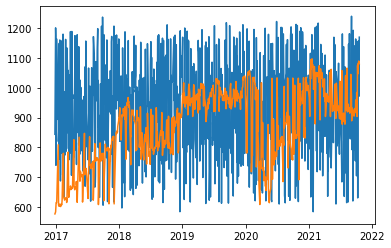

In [ ]:
plt.plot(all_df.index[0:1037],train_pred)
plt.plot(all_df.index[0:1037],all_df['Terakhir'][0:1037])

(array([[ 843.9673 ],
        [1202.0254 ],
        [1175.7919 ],
        [ 739.6599 ],
        [ 864.3117 ],
        [ 819.6721 ],
        [1164.0651 ],
        [ 893.58453],
        [1005.201  ],
        [ 761.175  ]], dtype=float32),
 array([576.13, 582.88, 594.3 , 611.62, 613.8 , 613.54, 627.67, 808.76,
        605.77, 601.68]))

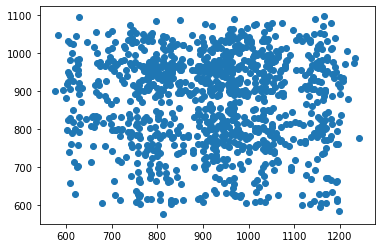

In [ ]:
plt.scatter(train_actual,all_df['Terakhir'][0:1037])

In [ ]:
normalized_price[0:1037]

array([[0.        ],
       [0.01013422],
       [0.02727982],
       ...,
       [0.77200252],
       [0.771432  ],
       [0.75844519]])

In [317]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame named 'data' containing the opening price and closing price columns
# Extract the relevant columns for analysis
columns_of_interest = ['Pembukaan', 'Terakhir','Tertinggi','Terendah','ATR']
data_subset = all_df[columns_of_interest]

# Add a constant column to the data
data_subset = sm.add_constant(data_subset)

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = data_subset.columns
vif["VIF"] = [variance_inflation_factor(data_subset.values, i) for i in range(data_subset.shape[1])]

print(vif)


    Variable         VIF
0      const   48.510727
1  Pembukaan  719.152924
2   Terakhir  783.739198
3  Tertinggi  965.453315
4   Terendah  966.325966
5        ATR    1.651483


In [ ]:
#all_df['Terakhir'][0:1037]
all_df.max()

Terakhir                1242.190000
Pembukaan               1244.280000
Close IDR              16504.800781
Consumer Confidence      128.200000
Emas USD                2069.400000
BI Rate                    6.000000
dtype: float64

In [ ]:
y_train

0       0.000000
1       0.010134
2       0.027280
3       0.053283
4       0.056556
          ...   
1032    0.757905
1033    0.756193
1034    0.772003
1035    0.771432
1036    0.758445
Name: Terakhir, Length: 1037, dtype: float64

In [ ]:
train_actual

array([[ 812.98],
       [1197.07],
       [1156.62],
       ...,
       [1146.11],
       [ 966.99],
       [1179.98]])

In [ ]:
prediksi = model.predict(X_train)

In [ ]:
scaler1.inverse_transform(y_train.values.reshape(-1,1))

array([[ 576.13],
       [ 582.88],
       [ 594.3 ],
       ...,
       [1090.33],
       [1089.95],
       [1081.3 ]])

In [ ]:
scaler1.inverse_transform(prediksi)

array([[ 585.6554 ],
       [ 585.7504 ],
       [ 594.44867],
       ...,
       [1079.6755 ],
       [1089.5576 ],
       [1089.5573 ]], dtype=float32)